In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 4. Analysis of Relationships in Data
Conducting analysis of data of the two subsets of reddit submissions data.  
1. Above average submissions (score greater than DATA_SET_MEAN)
2. Below average submissions (subsampled submissions with score less than DATA_SET_MEAN)

In [10]:
above_avg = pd.read_json('./data-subsets/submissions-above-avg.json.gz', lines=True, orient='records', compression='gzip')
below_avg = pd.read_json('./data-subsets/submissions-below-avg.json.gz', lines=True, orient='records', compression='gzip')

In [25]:
above_avg['score'].describe()

count    103812.000000
mean       2325.698079
std        8693.994248
min          38.000000
25%          57.000000
50%         111.000000
75%         432.000000
max      202717.000000
Name: score, dtype: float64

In [26]:
below_avg['score'].describe()

count    103812.000000
mean          2.693186
std           3.689245
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          37.000000
Name: score, dtype: float64

## 4.1 Post Title Analysis

Does the length of the post title have an affect on the submission score?  
Between above average and below average submissions, is there a difference in their title lengths?

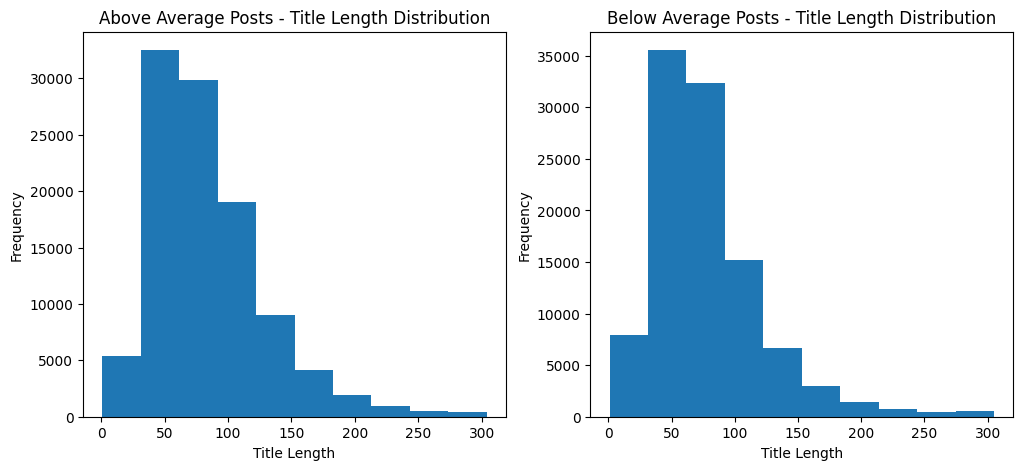

In [13]:
# Visualize the distributions of post title length between the two groups
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

axes[0].hist(above_avg['title_length'])
axes[0].set_title('Above Average Posts - Title Length Distribution')
axes[0].set_xlabel('Title Length')
axes[0].set_ylabel('Frequency')

axes[1].hist(below_avg['title_length'])
axes[1].set_title('Below Average Posts - Title Length Distribution')
axes[1].set_xlabel('Title Length')
axes[1].set_ylabel('Frequency')

fig.show()
# fig.savefig('./figures/4.1-scatter-title-postfreq-score.jpg')

### 4.2 Mann Whitney U Test between the two groups on title_length
Assumptions of the test
- Observations of post title length are independent, the title of one submission does not affect another
- Post tile lengths are ordinal and can be sorted

Null hypothesis: Between the two groups, the sort order of title lengths is roughly equal  
Alternative hypothesis: Between the two groups, title lengths of one group tend to sort higher than the other

In [24]:
stats.mannwhitneyu(above_avg['title_length'], below_avg['title_length']).pvalue

3.218388806506345e-297

## User Post Frequency Analysis

Does the frequency in which a user posts in certain subreddit affect their submission performance?  
Are above average posts from users that frequently post more? Are below average posts from users that post less?

## Post Time Analysis

Does the time in which a post is created affect the performance at all?  
How do submissions scores that are posted during peak reddit usage times differ from posts made outside these times?  
Does the number of posts made in a time period affect the average score of submissions?